## Контекст
Набор данных включает данные нескольких датчиков, собранных с синхронного двигателя с постоянными магнитами (PMSM), установленного на испытательном стенде. PMSM представляет собой прототип немецкой OEM-модели. Измерения испытательного стенда были собраны отделом LEA Падерборнского университета.

## Содержание
Все записи дискретизируются с частотой 2 Гц (т.е. 1 ряд в 2 секунды). Набор данных состоит из нескольких сеансов измерений, которые можно отличить друг от друга по столбцу «profile_id». Сеанс измерения может длиться от одного до шести часов.

Двигатель приводится в действие разработанными вручную циклами движения, обозначающими  скорость двигателя и крутящий момент.

Токи в d/q-координатах (столбцы «id» и «iq») и напряжения в d/q-координатах (столбцы «ud» и «uq») являются результатом стандартной стратегии управления, пытающейся следовать эталонной скорости и крутящему моменту.
Столбцы «motor_speed» и «torque» представляют собой результирующие величины, достигнутые этой стратегией, полученные из заданных токов и напряжений.

Большинство управляемых циклов обозначают случайные блуждания в плоскости скорость-крутящий момент, чтобы более точно имитировать циклы реального мира.


## Вдохновение
Наиболее интересными целевыми характеристиками являются температура ротора ("pm"), температура статора ("stator_") и крутящий момент ("torque").

В частности, температура ротора и крутящий момент не могут быть надежно и экономически измерены в коммерческом транспортном средстве.

Возможность иметь надежные средства оценки температуры ротора помогает автомобильной промышленности производить двигатели с меньшим количеством материалов и позволяет  управлять двигателем максимально эфективно.
Точная оценка крутящего момента приводит к более точному и адекватному управлению двигателем, снижению потерь мощности и, в конечном итоге, накоплению тепла.

## Примечания

1. profile_id это номер сессии испытаний. т.е. в датасете несколько испытаний и у них есть айдишник, 1 испытание может идти до 6 часов. каждя запись это показатели через 2 секунды от предыдущей. 
2. Значения в данных это отклонения от эталонных.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('measures_v2.csv')
df.head(10)

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,0.187101,17
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,0.245417,17
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,0.176615,17
3,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,0.238303,17
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,0.208197,17
5,-0.538973,18.901548,19.077108,0.009147,18.290628,0.009636,-0.613635,0.336747,24.573601,18.323862,19.850634,0.476218,17
6,-0.653148,18.941711,19.074583,0.238890,18.292524,0.001337,-1.005647,0.554211,24.576578,18.321936,19.850630,0.670015,17
7,-0.758392,18.960861,19.082499,0.395099,18.294041,0.001422,-1.288384,0.706370,24.574949,18.314655,19.850628,0.752035,17
8,-0.727128,18.973545,19.085533,0.546623,18.291964,0.000577,-1.490530,0.817339,24.567080,18.306925,19.850626,0.910541,17
9,-0.874307,18.987812,19.076025,0.578944,18.287233,-0.001248,-1.634464,0.898013,24.553242,18.301733,19.850624,0.924010,17


**1. Проведите разведочный анализ данных, убедитесь в том, что нет пропущенных значений, выбросов, постройте матрицу корреляций признаков. Постройте pairplot**

In [3]:
df.dtypes

u_q               float64
coolant           float64
stator_winding    float64
u_d               float64
stator_tooth      float64
motor_speed       float64
i_d               float64
i_q               float64
pm                float64
stator_yoke       float64
ambient           float64
torque            float64
profile_id          int64
dtype: object

In [4]:
df.isnull().sum()

u_q               0
coolant           0
stator_winding    0
u_d               0
stator_tooth      0
motor_speed       0
i_d               0
i_q               0
pm                0
stator_yoke       0
ambient           0
torque            0
profile_id        0
dtype: int64

In [5]:
round(df.describe(), 3)

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
count,1330816.000,1330816.000,1330816.000,1330816.000,1330816.000,1330816.000,1330816.000,1330816.000,1330816.000,1330816.000,1330816.000,1330816.000,1330816.000
mean,54.279,36.230,66.343,-25.134,56.879,2202.081,-68.717,37.413,58.507,48.188,24.565,31.106,40.793
std,44.173,21.786,28.672,63.092,22.952,1859.663,64.933,92.182,19.001,19.991,1.930,77.136,25.045
min,-25.291,10.624,18.586,-131.530,18.134,-275.549,-278.004,-293.427,20.857,18.077,8.783,-246.467,2.000
25%,12.070,18.698,42.788,-78.691,38.416,317.111,-115.406,1.096,43.152,31.990,23.185,-0.137,17.000
50%,48.938,26.900,65.110,-7.430,56.036,1999.977,-51.094,15.774,60.266,45.626,24.797,10.860,43.000
75%,90.034,49.857,88.141,1.470,75.587,3760.639,-2.980,100.612,72.008,61.461,26.217,91.597,65.000
max,133.037,101.599,141.363,131.470,111.946,6000.015,0.052,301.708,113.607,101.148,30.714,261.006,81.000


In [6]:
df['profile_id'].unique()

array([17,  5, 12, 32, 21,  2,  4,  7, 19,  3,  9, 23, 27, 26, 11,  6, 10,
       13, 31, 18, 30, 29,  8, 24, 20, 15, 14, 16, 36, 74, 75, 41, 68, 50,
       53, 49, 81, 80, 59, 54, 57, 70, 51, 55, 45, 69, 61, 76, 56, 64, 72,
       73, 62, 65, 63, 43, 47, 66, 42, 48, 67, 44, 79, 52, 60, 46, 58, 78,
       71], dtype=int64)

In [7]:
df['profile_id'].nunique()

69

In [8]:
round(df['motor_speed'].describe(), 3)

count    1330816.000
mean        2202.081
std         1859.663
min         -275.549
25%          317.111
50%         1999.977
75%         3760.639
max         6000.015
Name: motor_speed, dtype: float64

In [9]:
df.corr().style.background_gradient('summer_r')

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
u_q,1.000000,0.051721,0.050610,0.004702,0.104373,0.683556,-0.100357,-0.124589,0.122365,0.090992,0.150264,-0.136215,-0.030499
coolant,0.051721,1.000000,0.504835,0.195517,0.674974,0.011872,0.074865,-0.256389,0.467117,0.860750,0.525963,-0.257982,0.635797
stator_winding,0.050610,0.504835,1.000000,-0.234950,0.970135,0.432034,-0.624370,0.065617,0.795893,0.860268,0.333208,0.095510,0.340580
u_d,0.004702,0.195517,-0.234950,1.000000,-0.142749,-0.288472,0.448331,-0.723069,-0.172031,-0.008098,0.203647,-0.753779,0.263264
stator_tooth,0.104373,0.674974,0.970135,-0.142749,1.000000,0.398431,-0.487062,-0.042294,0.832084,0.953115,0.443470,-0.018413,0.450821
motor_speed,0.683556,0.011872,0.432034,-0.288472,0.398431,1.000000,-0.700609,-0.068881,0.458947,0.255790,0.118232,-0.043903,-0.028585
i_d,-0.100357,0.074865,-0.624370,0.448331,-0.487062,-0.700609,1.000000,-0.231344,-0.427736,-0.278005,0.016397,-0.274097,0.053524
i_q,-0.124589,-0.256389,0.065617,-0.723069,-0.042294,-0.068881,-0.231344,1.000000,-0.142416,-0.131466,-0.314044,0.996457,-0.324654
pm,0.122365,0.467117,0.795893,-0.172031,0.832084,0.458947,-0.427736,-0.142416,1.000000,0.756684,0.513728,-0.117138,0.386241
stator_yoke,0.090992,0.860750,0.860268,-0.008098,0.953115,0.255790,-0.278005,-0.131466,0.756684,1.000000,0.520382,-0.117118,0.563437


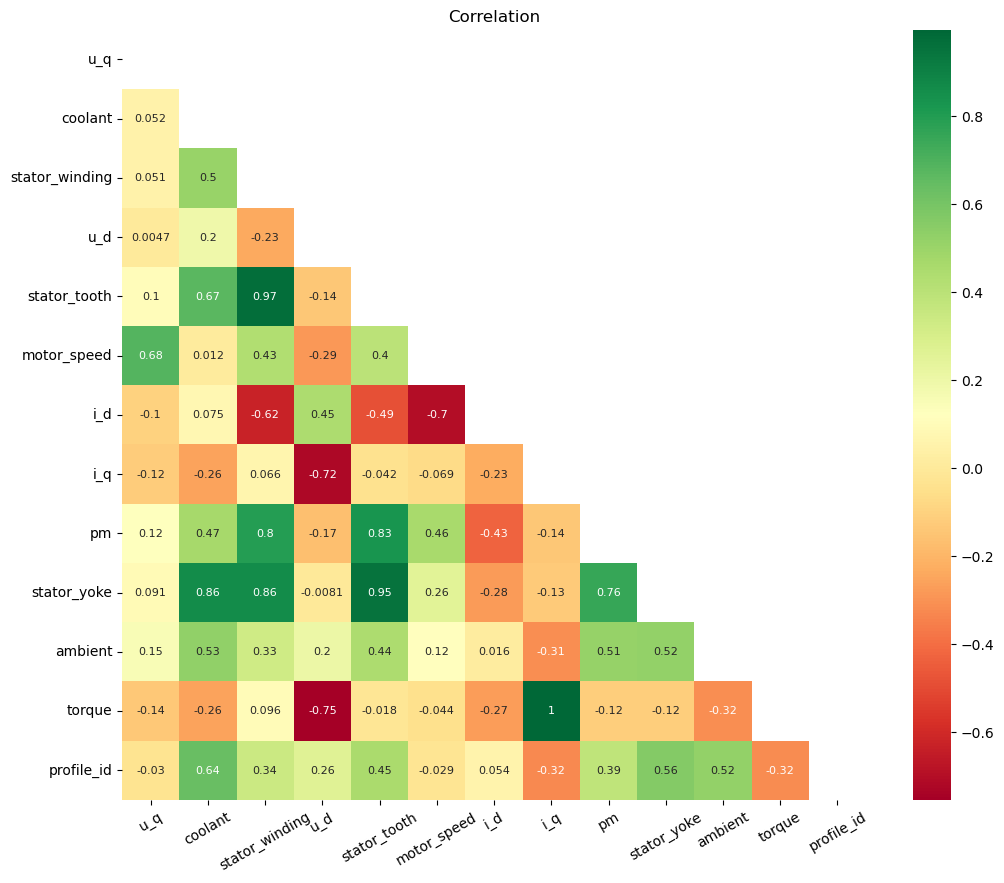

In [10]:
mask = np.triu(df.corr())
plt.figure(figsize = (12,10))
sns.heatmap(df.corr(), annot= True, cmap = "RdYlGn", annot_kws = {'size': 8}, mask = mask)
plt.title('Correlation')
plt.xticks(rotation = 30)
plt.show()

In [11]:
df17 = (df[df['profile_id']==17]).copy(deep = True)
round(df17, 4).head(10)

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
0,-0.4507,18.8052,19.0867,-0.3501,18.2932,0.0029,0.0044,0.0003,24.5542,18.3165,19.8507,0.1871,17
1,-0.3257,18.8186,19.0924,-0.3058,18.2948,0.0003,0.0006,-0.0008,24.5381,18.3150,19.8507,0.2454,17
2,-0.4409,18.8288,19.0894,-0.3725,18.2941,0.0024,0.0013,0.0004,24.5447,18.3263,19.8507,0.1766,17
3,-0.3270,18.8356,19.0830,-0.3162,18.2925,0.0061,0.0000,0.0020,24.5540,18.3308,19.8506,0.2383,17
4,-0.4712,18.8570,19.0825,-0.3323,18.2914,0.0031,-0.0643,0.0372,24.5654,18.3267,19.8506,0.2082,17
5,-0.5390,18.9015,19.0771,0.0091,18.2906,0.0096,-0.6136,0.3367,24.5736,18.3239,19.8506,0.4762,17
6,-0.6531,18.9417,19.0746,0.2389,18.2925,0.0013,-1.0056,0.5542,24.5766,18.3219,19.8506,0.6700,17
7,-0.7584,18.9609,19.0825,0.3951,18.2940,0.0014,-1.2884,0.7064,24.5749,18.3147,19.8506,0.7520,17
8,-0.7271,18.9735,19.0855,0.5466,18.2920,0.0006,-1.4905,0.8173,24.5671,18.3069,19.8506,0.9105,17
9,-0.8743,18.9878,19.0760,0.5789,18.2872,-0.0012,-1.6345,0.8980,24.5532,18.3017,19.8506,0.9240,17


In [12]:
df17.drop('profile_id', axis = 1, inplace = True)

In [13]:
df17.corr().style.background_gradient('summer_r')

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque
u_q,1.000000,-0.239625,-0.784396,0.966760,-0.700702,0.203129,0.897917,-0.969098,-0.464588,-0.635884,0.416671,-0.968925
coolant,-0.239625,1.000000,0.204825,-0.245829,0.183733,0.002441,-0.237983,0.246189,0.123472,0.170986,-0.076361,0.246063
stator_winding,-0.784396,0.204825,1.000000,-0.836115,0.987628,0.173924,-0.819573,0.826689,0.850041,0.963280,-0.010320,0.827855
u_d,0.966760,-0.245829,-0.836115,1.000000,-0.753740,-0.049241,0.978941,-0.999511,-0.506054,-0.686764,0.397286,-0.999797
stator_tooth,-0.700702,0.183733,0.987628,-0.753740,1.000000,0.194620,-0.737416,0.742230,0.916888,0.991399,0.123749,0.743361
motor_speed,0.203129,0.002441,0.173924,-0.049241,0.194620,1.000000,-0.242610,0.033396,0.182916,0.196263,0.166127,0.038465
i_d,0.897917,-0.237983,-0.819573,0.978941,-0.737416,-0.242610,1.000000,-0.975509,-0.482295,-0.668893,0.387535,-0.977335
i_q,-0.969098,0.246189,0.826689,-0.999511,0.742230,0.033396,-0.975509,1.000000,0.491600,0.674204,-0.410845,0.999784
pm,-0.464588,0.123472,0.850041,-0.506054,0.916888,0.182916,-0.482295,0.491600,1.000000,0.947211,0.422252,0.492173
stator_yoke,-0.635884,0.170986,0.963280,-0.686764,0.991399,0.196263,-0.668893,0.674204,0.947211,1.000000,0.212657,0.675194


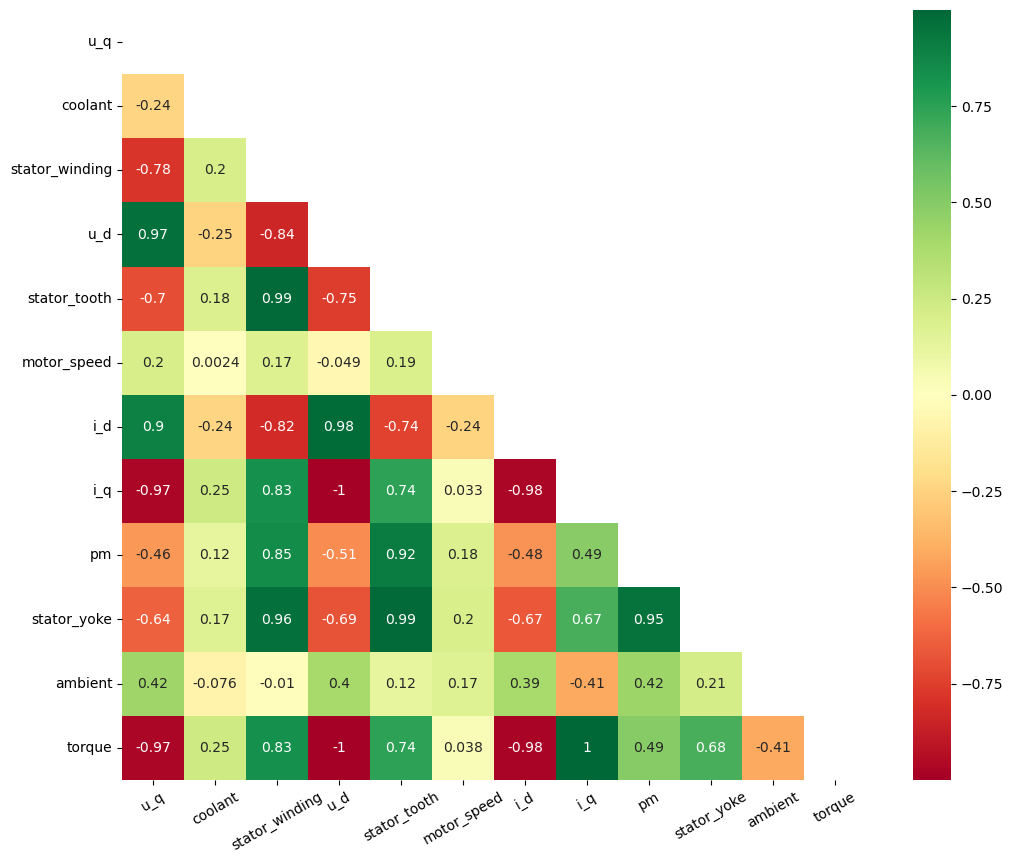

In [14]:
mask17 = np.triu(df17.corr())
plt.figure(figsize = (12,10))
sns.heatmap(df17.corr(), annot = True, cmap = "RdYlGn", mask = mask17)
plt.xticks(rotation = 30)
plt.show()

_Как видно из корреляционного графика, все температуры имеют очень сильную зависимость, части статора нагреваются_

_равномерно, за ними следует ротор, температура которого тоже поднимается с ростом нагрева статора_

In [15]:
round(df17['stator_tooth'],0).unique()

array([18., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29., 30.,
       31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42., 43.,
       44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55., 56.,
       57., 58., 59.])

In [16]:
round(df17['stator_winding'], 0).unique()

array([19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29., 30., 31.,
       32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42., 43., 44.,
       45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55., 56., 57.,
       58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68., 69., 70.,
       71., 72.])

In [17]:
X17 = df17.drop('motor_speed', axis = 1)
y17 = df17['motor_speed']

Если строка в 2 секунды, то данный сеанс (17) длился чуть меньше 9 часов

**2. Постройте линейную регрессию. В качестве целевой переменной выступает 'motor_speed'. В качестве метрик используйте MAE и MSE. Используйте перекрестную проверку на 5 фолдах. Провизаулизируйте решения.**

In [18]:
df.head(10)

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,0.187101,17
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,0.245417,17
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,0.176615,17
3,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,0.238303,17
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,0.208197,17
5,-0.538973,18.901548,19.077108,0.009147,18.290628,0.009636,-0.613635,0.336747,24.573601,18.323862,19.850634,0.476218,17
6,-0.653148,18.941711,19.074583,0.238890,18.292524,0.001337,-1.005647,0.554211,24.576578,18.321936,19.850630,0.670015,17
7,-0.758392,18.960861,19.082499,0.395099,18.294041,0.001422,-1.288384,0.706370,24.574949,18.314655,19.850628,0.752035,17
8,-0.727128,18.973545,19.085533,0.546623,18.291964,0.000577,-1.490530,0.817339,24.567080,18.306925,19.850626,0.910541,17
9,-0.874307,18.987812,19.076025,0.578944,18.287233,-0.001248,-1.634464,0.898013,24.553242,18.301733,19.850624,0.924010,17


### Сперва попробую с помощью температуры ротора предсказать скорость

In [19]:
X = round(df[['pm']], 4)
y = round(df['motor_speed'], 4)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

y_train_pred = lr.predict(X_train)

In [20]:
lr.coef_, lr.intercept_

(array([44.92540983]), -425.4416439738711)

In [21]:
round(X_test.describe(),4)

,pm
count,266164.0000
mean,58.4424
std,18.9791
min,20.8786
25%,43.0963
50%,60.2110
75%,71.9425
max,113.6002


<function matplotlib.pyplot.show(close=None, block=None)>

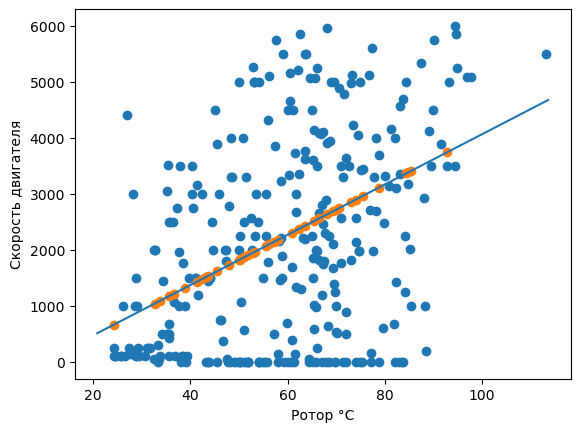

In [22]:
plt.scatter(X_train[:300], y_train[:300])

plt.scatter(X_train[:40], y_train_pred[:40])
plt.xlabel('Ротор °C')
plt.ylabel('Скорость двигателя')

def line_f(x):
    return lr.intercept_ + x*lr.coef_

x = [20.8864, 113.5897]
y = line_f(x)
plt.plot(x, y)
plt.show

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mean_absolute_error(y_train_pred, y_train), mean_squared_error(y_train_pred, y_train)

(1363.2711533952286, 2730362.401439046)

_Изначально так делать было бессмысленно, но было интересно посмотреть, что из такого обучения модели выйдет_

**тренировочный**

In [24]:
y_t1_pred = lr.predict(X_test)
y_t1_pred

array([1735.32680773, 3265.49075922, 2422.24530917, ..., 1789.6506133 ,
       2347.55232278, 3799.88300173])

In [25]:
np.array(y_test) # невооруженным глазом видно, ошибка огромная

array([1444.9609, 4076.2445, 3036.7603, ..., 2522.1326, 4499.9531,
       3999.9556])

In [26]:
mean_absolute_error(y_t1_pred, y_test), mean_squared_error(y_t1_pred, y_test)

(1361.8320613233793, 2728082.577410871)

### Теперь попробую по нескольким параметрам

In [27]:
df['stator'] = (df['stator_tooth']+df['stator_winding']+df['stator_yoke'])/3 # средняя температура по всему статору
### там все равно очень большая корреляция

In [28]:
X = df[['pm', 'stator']]
y = df['motor_speed']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
lr.fit(X_train, y_train)

LinearRegression()

<IPython.core.display.Javascript object>


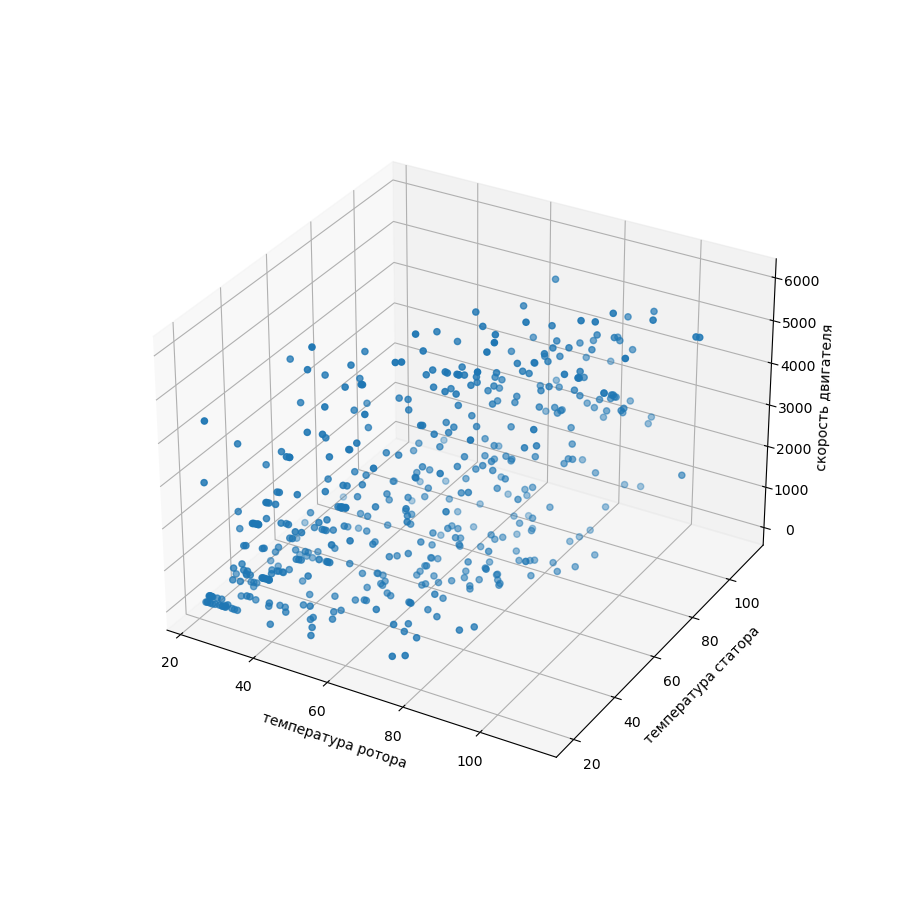

In [30]:
%matplotlib notebook

fig = plt.figure(figsize = (9,9))
ax = fig.add_subplot(projection='3d')

x_points = X_train.pm[:500]
y_points = X_train.stator[:500]
z_points = y_train[:500]


ax.scatter(x_points, y_points, z_points)

ax.set_xlabel('температура ротора')
ax.set_ylabel("температура статора")
ax.set_zlabel("скорость двигателя")

plt.show()

_Здесь уже даже что-то отдаленно напоминает линейную зависимость_

In [31]:
y_train_pred = lr.predict(X_train)
y_train_pred

array([2738.01480208, 3722.09153595, 1972.11855122, ..., 3009.59319613,
       2509.19583297,  519.55694176])

In [32]:
mean_absolute_error(y_train_pred, y_train), mean_squared_error(y_train_pred, y_train)

(1364.8797649844867, 2732733.5020105136)

In [33]:
y_test_pred = lr.predict(X_test)
y_test_pred

array([3385.82027152, 2410.41351354, 1158.47443651, ..., 2923.46773778,
       2884.87082034, 1436.55429843])

In [34]:
np.array(round(y_test, 2))

array([5249.94,  250.03, 1999.98, ...,  749.59, 3293.37,   -0.  ])

In [35]:
mean_absolute_error(y_test_pred, y_test), mean_squared_error(y_test_pred, y_test)

(1362.1671595637174, 2721783.720257647)

_**MAE** и  **MSE** все равно получаются очень большие_

*Данные на тренировочном и тестовом образце практически идентичны*

### Попробую по трем параметрам (u_q, i_d, pm)

In [36]:
X = df[['u_q', 'i_d', 'pm']]
y = df['motor_speed']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
lr.fit(X_train, y_train)

LinearRegression()

In [38]:
y_tr_predicted = lr.predict(X_train)
y_tr_predicted

array([4457.84384605, 4441.87995768,  384.13844468, ..., 3036.78561816,
       4100.05688291, 4431.83455243])

In [39]:
np.array(round(y_train, 2))

array([4677.55, 4999.95,  250.01, ..., 2220.98, 3999.96, 5334.73])

In [40]:
mean_absolute_error(y_tr_predicted, y_train), mean_squared_error(y_tr_predicted, y_train)

(479.9410023312218, 394817.75689108163)

In [41]:
y_tes_predicted = lr.predict(X_test)
y_tes_predicted

array([2928.69784512, 3724.22409393, -458.27438291, ...,  381.39824979,
       1808.73388482, 1253.81589421])

In [42]:
np.array(round(y_test,2))

array([1832.92, 3299.97,  249.99, ...,  249.99, 1499.99,  749.99])

In [43]:
mean_absolute_error(y_tes_predicted, y_test), mean_squared_error(y_tes_predicted, y_test)

(481.81261068661024, 397340.7094713441)

В варианте поиска по трем параметрам ошибка ***MAE*** и ***MSE*** стали значительно ниже.

*Хотя это может быть связано с тем, что для прогнозирования результатов были выбраны параметры с высокой корреляцией
относительно скорости двигателя*

### Попытка определения на всем датасете

In [44]:
df.head(10).style.background_gradient(cmap='twilight')

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id,stator
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,0.187101,17,18.565479
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,0.245417,17,18.567384
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,0.176615,17,18.569927
3,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,0.238303,17,18.568802
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,0.208197,17,18.566872
5,-0.538973,18.901548,19.077108,0.009147,18.290628,0.009636,-0.613635,0.336747,24.573601,18.323862,19.850634,0.476218,17,18.563866
6,-0.653148,18.941711,19.074583,0.238890,18.292524,0.001337,-1.005647,0.554211,24.576578,18.321936,19.850630,0.670015,17,18.563014
7,-0.758392,18.960861,19.082499,0.395099,18.294041,0.001422,-1.288384,0.706370,24.574949,18.314655,19.850628,0.752035,17,18.563732
8,-0.727128,18.973545,19.085533,0.546623,18.291964,0.000577,-1.490530,0.817339,24.567080,18.306925,19.850626,0.910541,17,18.561474
9,-0.874307,18.987812,19.076025,0.578944,18.287233,-0.001248,-1.634464,0.898013,24.553242,18.301733,19.850624,0.924010,17,18.554997


In [45]:
X = df.drop(['stator', 'profile_id', 'motor_speed',], axis = 1)
y = df['motor_speed']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [46]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
kf.get_n_splits(X_train, y_train)

for train, test in kf.split(X_train):
    print('X_Train:{0} | X_Test:{1}'.format(train,test))
    
for y_kf_train, y_kf_test in kf.split(y_train):
    print('Y_Train:{0} | Y_Test:{1}'.format(y_kf_train, y_kf_test))
    


X_Train:[ 212931  212932  212933 ... 1064649 1064650 1064651] | X_Test:[     0      1      2 ... 212928 212929 212930]
X_Train:[      0       1       2 ... 1064649 1064650 1064651] | X_Test:[212931 212932 212933 ... 425859 425860 425861]
X_Train:[      0       1       2 ... 1064649 1064650 1064651] | X_Test:[425862 425863 425864 ... 638789 638790 638791]
X_Train:[      0       1       2 ... 1064649 1064650 1064651] | X_Test:[638792 638793 638794 ... 851719 851720 851721]
X_Train:[     0      1      2 ... 851719 851720 851721] | X_Test:[ 851722  851723  851724 ... 1064649 1064650 1064651]
Y_Train:[ 212931  212932  212933 ... 1064649 1064650 1064651] | Y_Test:[     0      1      2 ... 212928 212929 212930]
Y_Train:[      0       1       2 ... 1064649 1064650 1064651] | Y_Test:[212931 212932 212933 ... 425859 425860 425861]
Y_Train:[      0       1       2 ... 1064649 1064650 1064651] | Y_Test:[425862 425863 425864 ... 638789 638790 638791]
Y_Train:[      0       1       2 ... 1064649 106

*Ну разделить определенно получилось, и даже x и y соответствуют друг другу*

In [47]:
kx1, kx2, kx3, kx4, kx5 = kf.split(X_train)

In [48]:
df_x = [kx1, kx2, kx3, kx4, kx5]

***Преобразование индексов***

_Тренировочная_

In [49]:
x1 = pd.DataFrame(data = X, index=kx1[0])
x2 = pd.DataFrame(data = X, index=kx2[0])
x3 = pd.DataFrame(data = X, index=kx3[0])
x4 = pd.DataFrame(data = X, index=kx4[0])
x5 = pd.DataFrame(data = X, index=kx5[0])

y1 = pd.Series(data = y, index=kx1[0])
y2 = pd.Series(data = y, index=kx2[0])
y3 = pd.Series(data = y, index=kx3[0])
y4 = pd.Series(data = y, index=kx4[0])
y5 = pd.Series(data = y, index=kx5[0])

_Тестовая_

In [50]:
x1_test = pd.DataFrame(data = X, index = kx1[1])
x2_test = pd.DataFrame(data = X, index = kx2[1])
x3_test = pd.DataFrame(data = X, index = kx3[1])
x4_test = pd.DataFrame(data = X, index = kx4[1])
x5_test = pd.DataFrame(data = X, index = kx5[1])

y1_test = pd.Series(data = y, index=kx1[1])
y2_test = pd.Series(data = y, index=kx2[1])
y3_test = pd.Series(data = y, index=kx3[1])
y4_test = pd.Series(data = y, index=kx4[1])
y5_test = pd.Series(data = y, index=kx5[1])

In [51]:
xf = [x1,x2,x3,x4,x5]
yf = [y1,y2,y3,y4,y5]
xf_test = [x1_test,x2_test,x3_test,x4_test,x5_test]
yf_test = [y1_test,y2_test,y3_test,y4_test,y5_test]

In [52]:
x1.shape,x2.shape,x3.shape,x4.shape,x5.shape

((851721, 11), (851721, 11), (851722, 11), (851722, 11), (851722, 11))

In [53]:
y1.shape, y2.shape , y3.shape , y4.shape, y5.shape

((851721,), (851721,), (851722,), (851722,), (851722,))

In [54]:
for a, b, c, d in zip(xf, yf, xf_test, yf_test):
    lr.fit(a, b)
    lr_predd = lr.predict(c)
    print('MAE:%.3f | MSE:%.3f' %(mean_absolute_error(lr_predd, d), mean_squared_error(lr_predd, d)))

MAE:299.099 | MSE:169490.817
MAE:383.456 | MSE:209399.713
MAE:365.376 | MSE:243596.849
MAE:403.900 | MSE:326078.251
MAE:366.939 | MSE:303067.651


***Лучше всего проявляет себя первая модель, ее и буду использовать для тестирования на валидационных данных***

In [55]:
X_val.shape, y_val.shape

((266164, 11), (266164,))

In [56]:
lr.fit(x1, y1)
val_lr_predicted = lr.predict(X_val)
MAE = mean_absolute_error(val_lr_predicted, y_val)
MSE = mean_squared_error(val_lr_predicted, y_val)
print("MAE:%.3f | MSE:%.3f"%(MAE,MSE))

MAE:349.020 | MSE:220067.151


**3. Постройте knn. В качестве целевой переменной выступает 'motor_speed'. В качестве метрик используйте MAE и MSE. Используйте перекрестную проверку на 5 фолдах. Провизаулизируйте решения.**

In [57]:
%%time

from sklearn.model_selection import cross_validate  ### Какой-то бред
from sklearn.neighbors import KNeighborsRegressor   ### но хотелось попробовать

#knr = KNeighborsRegressor(n_neighbors=3)
#cvs = cross_validate(knr, X_train, y_train,cv = 5, scoring=('neg_mean_absolute_error', 'neg_mean_squared_error'))
#print(cvs['test_neg_mean_absolute_error'])
#print(cvs['test_neg_mean_squared_error'])

CPU times: total: 62.5 ms
Wall time: 33 ms


***Решил оставить ту же разбивку, что и было выше в ЛР***

_Проверка на тестовом варианте_

In [58]:
%%time

knr = KNeighborsRegressor(n_neighbors=5)
for h, j, k, l in zip(xf, yf, xf_test, yf_test):
    knr.fit(h, j)
    kn_predd = knr.predict(k)
    print("MAE:%.2f | MSE %.2f" %(mean_absolute_error(kn_predd, l), mean_squared_error(kn_predd,l)))

MAE:89.93 | MSE 22295.40
MAE:74.87 | MSE 12027.83
MAE:82.73 | MSE 19069.04
MAE:55.96 | MSE 9901.48
MAE:51.11 | MSE 13380.79
CPU times: total: 1min 19s
Wall time: 1min 19s


In [59]:
%%time

knr = KNeighborsRegressor(n_neighbors=3)
for h, j, k, l in zip(xf, yf, xf_test, yf_test):
    knr.fit(h, j)
    kn_predd = knr.predict(k)
    print("MAE:%.2f | MSE %.2f" %(mean_absolute_error(kn_predd, l), mean_squared_error(kn_predd,l)))

MAE:90.83 | MSE 22982.54
MAE:69.03 | MSE 11255.18
MAE:80.11 | MSE 18099.09
MAE:58.26 | MSE 10482.91
MAE:53.72 | MSE 13877.84
CPU times: total: 1min 15s
Wall time: 1min 15s


_Подозрительно маленькая ошибка_

_Проверка на тренировочном варианте_

In [60]:
knr.fit(X_train, y_train)
knr_train_pred = knr.predict(X_train)
print(mean_absolute_error(knr_train_pred, y_train), mean_squared_error(knr_train_pred, y_train))

7.216398055225336 455.61544482314133


In [61]:
pd.Series(knr_train_pred) # Индексы не совпадают, потому что преобразовывал в сериес

0          1538.684662
1          1999.980591
2          1499.990322
3          1694.985758
4          5499.952962
              ...     
1064647     499.993969
1064648       0.003579
1064649     662.261758
1064650    3999.954753
1064651    4999.954102
Length: 1064652, dtype: float64

In [62]:
y_train

665463     1540.682753
63588      1999.982666
1162479    1499.987551
458280     1694.983154
492560     5499.952148
              ...     
673587      499.988196
645443        0.004023
797630      662.489409
549914     3999.950195
662        4999.959473
Name: motor_speed, Length: 1064652, dtype: float64

_Ну, ответы на тренировочной выборке почти идентичны, нормально ли это ?!_

***Следует проверить на валидационной выборке***

_Лучшие результаты на k = 3 показала себя 5я модель_

In [63]:
knr.fit(x5, y5)
val_knr_predicted = knr.predict(X_val)

In [64]:
mean_absolute_error(val_knr_predicted, y_val), mean_squared_error(val_knr_predicted, y_val)

(22.00376853074645, 4685.6541826134635)

_Невероятно умная модель получилась_ 😂

In [65]:
from sklearn.metrics import r2_score
r2_score(y_val, val_knr_predicted)

0.9986446153921305

In [74]:
df[df['profile_id']==17]

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id,stator
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,0.187101,17,18.565479
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,0.245417,17,18.567384
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,0.176615,17,18.569927
3,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,0.238303,17,18.568802
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,0.208197,17,18.566872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15959,131.232086,18.098608,49.645897,-6.513609,43.098316,4999.946777,-97.676331,0.980545,51.822525,33.403080,24.637297,-0.421235,17,42.049098
15960,131.169312,18.090189,49.578072,-6.500326,43.102539,4999.945312,-97.792351,0.953651,51.827511,33.396442,24.680479,-0.393254,17,42.025684
15961,131.102997,18.089109,49.575481,-6.498843,43.100647,4999.947266,-97.791840,0.931305,51.831402,33.393707,24.715746,-0.389909,17,42.023279
15962,131.055298,18.089380,49.606102,-6.476041,43.087551,4999.944336,-97.793709,0.903135,51.829365,33.398624,24.741184,-0.399254,17,42.030759


Почти 100% результат

Прям чудо какое-то

Но я почти уверен, что модель где-то жульничает 😡

**4. Сгенерируйте новые признаки:**
- Нормализация вектора тока. (корень квадратный из сумм квадратов токов)
- Нормализация вектора напряжения. (корень квадратный из сумм квадратов напряжения)
- Полная мощность (произведение нормализованного вектора тока и нормализованного вектора напряжения)
- Эффективная мощность (сумма произведений i_d c u_d и i_q с u_q)

**5. Заново постройте обе модели, сравните результаты с предыдущими. Провизаулизируйте решения, напишите выводы.**